# Table of Contents

### Import libraries
### Import dataframes
### Addressing PII data
### Separating low-revenue-customers
### Customer Profiling
### Customer profiles visualization
### Customer profiles aggregations
### Customers profiles by regions and departments








# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Dataframe

In [4]:
# Creating path

path = r'/Users/david/Desktop/CF/Data Immersion/Achievement 4 - Python Fundamentals for Data Analysts/07-2022 Instacart Basket Analysis'

In [5]:
# Check 'path'

path

'/Users/david/Desktop/CF/Data Immersion/Achievement 4 - Python Fundamentals for Data Analysts/07-2022 Instacart Basket Analysis'

In [6]:
# Importing 'ords_prods_cust_27_07.pkl' data set as 'ords_prods_cust' dataframe

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '27_07_22', 'ords_prods_cust_27_07.pkl'))

# 2.- Consider any security implications that might exist for this data. Address any PII data in dataframe 

In [10]:
# Addressing PII columns: 'first_name', and 'surname'-- the 'state' column will be left as is, as it'll be needed forward in the exercise.

ords_prods_cust_2 = ords_prods_cust.drop(columns = ['first_name', 'surname'])

In [8]:
# Checking columns 

ords_prods_cust_2.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_expenditure', 'expenditure_flag', 'purchase_frequency',
       'frequency_flag', 'Frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'dependants_num', 'marital_status', 'income'],
      dtype='object')

#### Creating region labels from 'Region 1' to 'Region 4'

In [11]:
ords_prods_cust_2.loc[ords_prods_cust_2['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Region 1'

In [12]:
ords_prods_cust_2.loc[ords_prods_cust_2['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Region 2'

In [13]:
ords_prods_cust_2.loc[ords_prods_cust_2['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'Region 3'

In [14]:
ords_prods_cust_2.loc[ords_prods_cust_2['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'Region 4'

In [15]:
ords_prods_cust_2['region'].value_counts()

Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
Name: region, dtype: int64

In [16]:
# Determine whether there's a difference in the spending habits between different U.S. regions

crosstab_expnd_rgn = pd.crosstab(ords_prods_cust_2['region'], ords_prods_cust_2['expenditure_flag'], dropna = False)

In [17]:
# Printing 'crosstab_expnd_rgn'

crosstab_expnd_rgn

expenditure_flag,High Spender,Low Spender
region,,
Region 1,108225,5614511
Region 2,155975,7441350
Region 3,209691,10582194
Region 4,160354,8132559


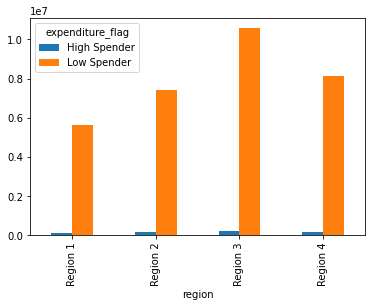

In [197]:


bar_expnd_rgn = crosstab_expnd_rgn.plot.bar()

# 4.- The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export this sample.

In [18]:
# Creating 'Low acivity' flag

ords_prods_cust_2.loc[ords_prods_cust_2['max_order'] < 5, 'activity_flag'] = 'Low activity' 

In [19]:
# Creating 'Regular activity' flag

ords_prods_cust_2.loc[ords_prods_cust_2['max_order'] >= 5, 'activity_flag'] = 'Regular activity'

In [20]:
# Check 'activity_flag'

ords_prods_cust_2['activity_flag'].value_counts(dropna = False)

Regular activity    30964564
Low activity         1440295
Name: activity_flag, dtype: int64

In [21]:
# Sparating (sample) subsets as 

#'Low activity'

low_activity_cust = ords_prods_cust_2[ords_prods_cust_2['activity_flag']=='Low activity']

In [22]:
# 'Regular activity'

regular_activity_cust = ords_prods_cust_2[ords_prods_cust_2['activity_flag']=='Regular activity']

In [23]:
regular_activity_cust.shape

(30964564, 34)

In [24]:
regular_activity_cust.head(2)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Frequency_flag,gender,state,age,date_joined,dependants_num,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,NaN,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,Regular activity
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,NaN,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,Regular activity


In [25]:
# Exporting 'regular_activity_cust'

regular_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '02_08_22', 'regular_activity_cust_03_08.pkl'))

# 5.-  Make customer profiling to create marketing strategies for different products. Create profiling variable based on age, income, goods in the 'department_id' variable , and number of dependants; consider labeling these profiles as 'single-adult' and 'young_parent'--also consider the 'orders_day_of_week' and 'orders_hour_of _day' variables.

#### Age profile

In [97]:
regular_activity_cust.loc[(regular_activity_cust['age'] <= 29), 'age_profile'] = 'Young adult'

In [98]:
regular_activity_cust.loc[(regular_activity_cust['age'] >= 30) & (regular_activity_cust['age'] <= 60), 'age_profile'] = 'Middle-age adult'

In [99]:
regular_activity_cust.loc[(regular_activity_cust['age'] >= 61), 'age_profile'] = 'Mature adult'

#### At the beginning, the following code was being used, but an error suggesting using .loc to avoid confusions in the system made me change the code below for the one above.

###### Creating age profile through if-statements w/ for loop

###### age_profile=[]

###### for value in regular_activity_cust['age']:
######    if value <= 29:
######        age_profile.append('Young adult')
######    elif (value >= 30) and (value <= 60):
######        age_profile.append('Middle-age adult')
######    elif value >= 61:
######        age_profile.append ('Mature adult')
######    else: 
######        age_profile.append('Not enough data')

###### (regular_activity_cust['age_profile']) = age_profile

In [100]:
regular_activity_cust['age_profile'].value_counts()

Middle-age adult    15034354
Mature adult        10112607
Young adult          5817603
Name: age_profile, dtype: int64

#### Income profile


##### The icnome parameters are typically  defined as follows:
###### Lower class............................< 32,048.00
###### Lower-middle class................32,049 - 53,243
###### Middle class............................53,244 - 106,827
###### Upper-middle class.................106,828 - 236,000
###### Upper class..............................>236,000


##### For time and simplification purposes, the 'Lower-middle class' will be part of the 'Lower class, and the 'Upper-middle class' will be part of the 'Upper class'

In [131]:
regular_activity_cust.loc[(regular_activity_cust['income'] <= 53243), 'income_profile'] = 'Low income'

In [132]:
regular_activity_cust.loc[(regular_activity_cust['income'] >= 53244) & (regular_activity_cust['income'] <= 106827), 'income_profile'] = 'Middle income'

In [134]:
regular_activity_cust.loc[(regular_activity_cust['income'] >= 106828), 'income_profile'] = 'High income'

In [150]:
regular_activity_cust['income_profile'].value_counts()

Middle income    14648940
High income      12342053
Low income        3973571
Name: income_profile, dtype: int64

#### Goods 


###### Grouping number of prodcuts by 'department_id'/'department' (name)

In [136]:
# Importing 'departments_wrangled.csv'

depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '19_07_22', 'departments_wrangled.csv'))

In [137]:
# Check 'depts' dataframe

depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [138]:
# Changing 'Unnamed:0' column

depts.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [139]:
depts.head(1)

,department_id,department
0,1,frozen


In [140]:
##### Merging 'department' (name) column into 'regular_activity_cust' dataframe

regular_activity_cust_2 = regular_activity_cust.merge(depts, on = 'department_id')

In [141]:
regular_activity_cust_2.value_counts('department')

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
dtype: int64

In [142]:
##### Grouping total number of products by department--or sold products by department 

regular_activity_cust_2.groupby('department').agg({'product_id' : ['sum']})

,product_id
,sum
department,
alcohol,3789799610
babies,10277673403
bakery,26830422740
beverages,64223732990
breakfast,17738364311
bulk,608828357
canned goods,23685069249
dairy eggs,131428162241


#### Dependants

In [143]:
# Count 'dependants_num' values

regular_activity_cust_2['dependants_num'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: dependants_num, dtype: int64

In [144]:
# Creating Dependants profile

regular_activity_cust_2.loc[(regular_activity_cust_2['dependants_num'] == 0), 'dependants_profile'] = 'No dependants'

In [145]:
regular_activity_cust_2.loc[(regular_activity_cust_2['dependants_num'] >= 1), 'dependants_profile'] = 'Dependants'

In [146]:
regular_activity_cust_2['dependants_profile'].value_counts()

Dependants       23224883
No dependants     7739681
Name: dependants_profile, dtype: int64

### Creating 'customer_profile' variable

#### Originally, a subset with the needed colums was created, but decided to change the way as for memory reasons the code was crashing when I was deriving the 'customer_profile' variable. Leving the used code below just as a reference to this matter.

regular_activity_cust_2.head(2)

user_merge = regular_activity_cust_2[['user_id', 'region', 'age_profile', 'income_profile', 'department', 'dependants_profile', 'frequency_flag', 'expenditure_flag']]

user_merge.shape

user_merge_dups = user_merge[user_merge.duplicated()]

user_merge_dups.shape

df_user = user_merge.drop_duplicates()

df_user.head(1)

df_user.shape

In [166]:
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Young adult') & (regular_activity_cust_2['income_profile'] == 'Low income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = "Young parent, low income"
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Young adult') & (regular_activity_cust_2['income_profile'] == 'Low income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Young adult, low income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Young adult') & (regular_activity_cust_2['income_profile'] == 'Middle income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young parent, middle income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Young adult') & (regular_activity_cust_2['income_profile'] == 'Middle income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Young adult, middle income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Young adult') & (regular_activity_cust_2['income_profile'] == 'High income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young parent, high income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Young adult') & (regular_activity_cust_2['income_profile'] == 'High income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Young adult, high income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Middle-age adult') & (regular_activity_cust_2['income_profile'] == 'Low income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Middle-age parent, low income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Middle-age adult') & (regular_activity_cust_2['income_profile'] == 'Low income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Middle-age adult, low income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Middle-age adult') & (regular_activity_cust_2['income_profile'] == 'Middle income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Middle-age parent, middle income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Middle-age adult') & (regular_activity_cust_2['income_profile'] == 'Middle income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Middle-age adult, middle income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Middle-age adult') & (regular_activity_cust_2['income_profile'] == 'High income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Middle age parent, high income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Middle-age adult') & (regular_activity_cust_2['income_profile'] == 'High income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Middle age adult, high income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Mature adult') & (regular_activity_cust_2['income_profile'] == 'Low income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Mature parent, low income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Mature adult') & (regular_activity_cust_2['income_profile'] == 'Low income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Mature adult, low income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Mature adult') & (regular_activity_cust_2['income_profile'] == 'Middle income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Mature parent, middle income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Mature adult') & (regular_activity_cust_2['income_profile'] == 'Middle income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Mature adult, middle income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Mature adult') & (regular_activity_cust_2['income_profile'] == 'High income') & (regular_activity_cust_2['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Mature parent, high income'
regular_activity_cust_2.loc[(regular_activity_cust_2['age_profile'] =='Mature adult') & (regular_activity_cust_2['income_profile'] == 'High income') & (regular_activity_cust_2['dependants_profile'] == 'No Dependants'), 'customer_profile'] = 'Mature adult, high income'

In [167]:
regular_activity_cust_2['customer_profile'].value_counts()

Middle-age parent, middle income    5307467
Mature parent, high income          4656843
Middle age parent, high income      4517845
Young parent, middle income         3472358
Mature parent, middle income        2217195
Middle-age parent, low income       1450080
Young parent, low income             835476
Mature parent, low income            705468
Young parent, high income             62151
Name: customer_profile, dtype: int64

# 6.- Visualization of customer profiles distribution

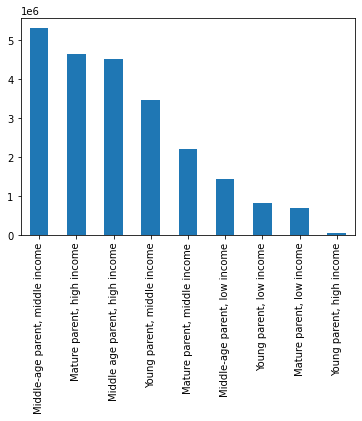

In [168]:
cust_prf_dist = regular_activity_cust_2['customer_profile'].value_counts().plot.bar()

##### The middle and high income groups are the customers that engage the most with the app.

##### Originally it was decided to work with the variables separately, but for memory reasons, the 'customer_profile' variable had to be derived. The idea of working with separate elements was to make crosstabs and, for example, compare the proportion of ages, incomes and dependants (_profile) by region, and age, and graphically see the concentration of orders placed according to regions and customers characteristics. 
#### the markdowns below this cell contain the codes that were going to be used. 

#### A new variable was to be created deriving it with  '.loc()' function, containing the whole customer information, but to save time I decided to create a subset with unique 'user_id' values, containing the 'region', 'age_profile', ' 'income_profile', 'dependants_profile'

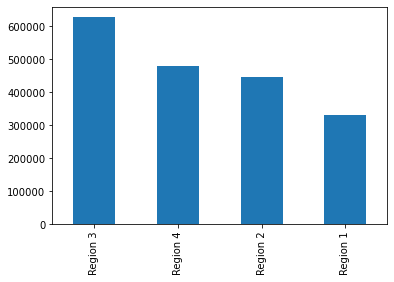

In [198]:
##### Regions' size markett

bar_region_dist = df_user['region'].value_counts().plot.bar('tab:cyan')

#### Region 3 has teh biggest market, whereas Region 1 has the smallest market. 

In [174]:
crosstab_rgn_age = pd.crosstab(regular_activity_cust_2['region'], regular_activity_cust_2['age_profile'], dropna = False)

crosstab_rgn_age.to_clipboard()

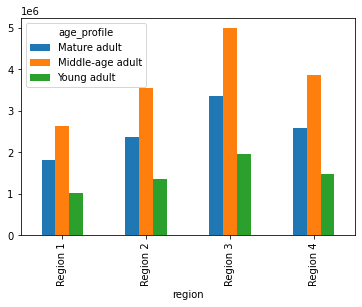

In [175]:
age_region_dist = crosstab_rgn_age.plot.bar()

#### The prdeominant group in all of the regions is the middle-age adults, followed by mature-adults; the young-adults groups is the smallest one in all of the regions. It's natural to see these patterns since tipically are the oldest groups that have a better financial situation.

In [176]:
crosstab_rgn_income = pd.crosstab(regular_activity_cust_2['region'], regular_activity_cust_2['income_profile'], dropna = False)

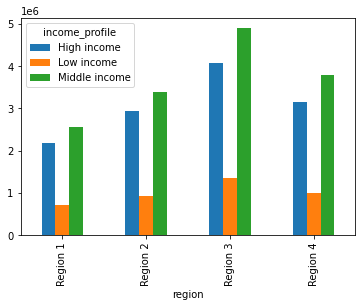

In [177]:
income_rgn_dist = crosstab_rgn_income.plot.bar()

#### Economist and sociologists are not wrong when they say the economy is moved by the middle class--the upper-middle class is right behind this group, and it's not a suprise, since many of the people within this group upgraded their finances. Also, the class that interacts the least is the upper-class, which puts in evidence one of the charateristics of this groups.

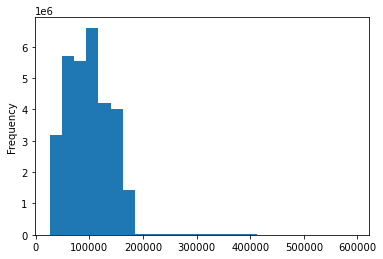

In [178]:
income_hist = regular_activity_cust_2['income'].plot.hist(bins = 25)

#### Confirmation of which class (group) interacts the most with the Insacart's market.

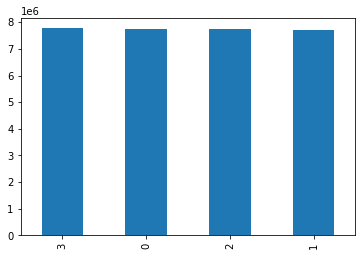

In [179]:
bar_dependants_num_dist = regular_activity_cust_2['dependants_num'].value_counts().plot.bar()

#### Dpendants distribution is pretty much equitative among users.

# 7.- Aggregate max, min, and mean variables on customer-profile level for usage frequency and expenditure

In [172]:
regular_activity_cust_2.groupby('customer_profile').agg({'purchase_frequency' : ['mean', 'min', 'max']})

purchase_frequency           
                                               mean  min   max
customer_profile                                              
Mature parent, high income                 9.584402  0.0  30.0
Mature parent, low income                 10.189600  0.0  30.0
Mature parent, middle income               9.751012  0.0  30.0
Middle age parent, high income             9.659521  0.0  30.0
Middle-age parent, low income             10.228072  0.0  30.0
Middle-age parent, middle income           9.625595  0.0  30.0
Young parent, high income                  8.713561  2.0  30.0
Young parent, low income                  10.084645  0.0  30.0
Young parent, middle income                9.569451  0.0  30.0

In [173]:
regular_activity_cust_2.groupby('customer_profile').agg({'average_expenditure' : ['mean', 'min', 'max']})

average_expenditure                         
                                                mean        min           max
customer_profile                                                             
Mature parent, high income                 14.195057   7.000000   7414.485185
Mature parent, low income                   6.511227   1.262500      7.000000
Mature parent, middle income                8.671031   1.300000   1665.042541
Middle age parent, high income             17.235954   7.000000   6983.593023
Middle-age parent, low income               6.822959   1.000000     11.857143
Middle-age parent, middle income            8.554450   1.522222   2550.966102
Young parent, high income                 271.877119  25.512938  10209.987755
Young parent, low income                    7.102166   1.628571     12.000000
Young parent, middle income                 8.618295   7.000000   3402.921296

# 8.- Compare customers profiles with regions and dpets.

In [181]:
# Customer profiles distribution by regions

cust_prf_rgn = pd.crosstab(regular_activity_cust_2['customer_profile'], regular_activity_cust_2['region'], dropna = False)

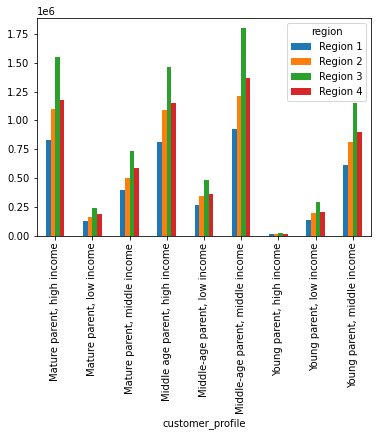

In [182]:
cust_prf_rgn_dist = cust_prf_rgn.plot.bar()

In [183]:
cust_prf_rgn

region,Region 1,Region 2,Region 3,Region 4
customer_profile,,,,
"Mature parent, high income",829348,1096146,1551703,1179646
"Mature parent, low income",125099,162789,235022,182558
"Mature parent, middle income",394376,502957,736250,583612
"Middle age parent, high income",815015,1091293,1460783,1150754
"Middle-age parent, low income",260892,344944,480913,363331
"Middle-age parent, middle income",925990,1214472,1798223,1368782
"Young parent, high income",9593,14186,22971,15401
"Young parent, low income",137978,198140,292609,206749
"Young parent, middle income",611912,813770,1150732,895944


In [184]:
cust_prf_dpts = pd.crosstab(regular_activity_cust_2['customer_profile'], regular_activity_cust_2['department'], dropna = False)

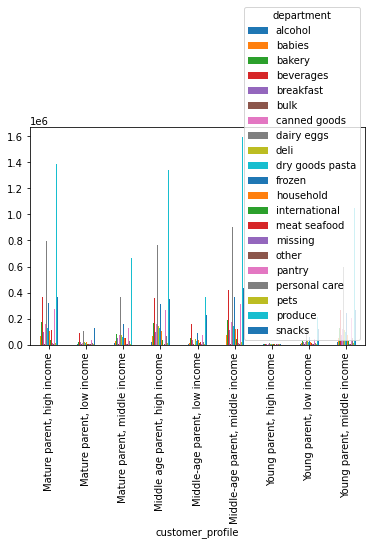

In [185]:
cust_prf_dpts_dist = cust_prf_dpts.plot.bar()

####  A table will be printed for better representation.

In [186]:
cust_prf_dpts

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
"Mature parent, high income",20022,64085,172332,369105,96678,4697,159571,793172,152569,128006,...,105473,38482,110792,9994,5228,273760,62958,14412,1390414,362575
"Mature parent, low income",3873,5336,21355,86744,20297,1124,15441,101977,21262,12188,...,19134,4174,5593,1261,779,33978,9887,1658,170922,123991
"Mature parent, middle income",10290,30415,80674,177273,46351,2551,73655,368444,72039,60207,...,49331,19069,50860,4599,2354,129128,29658,6649,662698,186971
"Middle age parent, high income",22751,62243,167101,356618,94991,4353,156155,766627,144746,125766,...,102843,38318,108042,9380,4910,268745,62173,13859,1344418,349497
"Middle-age parent, low income",7738,14272,47679,157903,38105,2073,35489,217179,45960,29079,...,36846,9573,16880,2829,1538,73173,19951,3481,368437,229905
"Middle-age parent, middle income",21591,73400,192177,421758,111192,5745,176102,900181,172365,145723,...,117053,45490,121503,11385,5682,309139,74001,15726,1592629,431081
"Young parent, high income",1700,767,2859,5547,1640,9,2313,11181,1786,1734,...,2612,517,1342,76,191,3812,1163,400,12245,4898
"Young parent, low income",3906,8614,27923,85437,21037,980,22531,130211,27051,18863,...,20100,6166,11810,1706,950,42993,11965,2859,214717,118667
"Young parent, middle income",15929,47932,127333,266175,74127,3919,119797,593834,112674,96274,...,75107,29741,82081,7603,4065,204073,46345,10414,1047352,268383


# 9.- All the suitable charts have been produced.

# 10.- Export final data set and save notebook

#### crosstabs will not b

### dataframes e exported as is data that was used to plot


#### ords_prods_cust_2
#### low_activity_cust
#### regular_activity_cust
#### regular_activity_cust_2

In [ ]:
df_instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart.pkl'))

In [201]:
ords_prods_cust_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '04_08_22', 'ords_prods_cust_2_04_08.pkl'))

In [202]:
low_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '04_08_22', 'low_activity_cust_04_08.pkl'))

In [203]:
regular_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '04_08_22', 'regular_activity_cust_04_08.pkl'))

In [204]:
regular_activity_cust_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '04_08_22', 'regular_activity_cust_2_04_08.pkl'))

### plots

#### bar_expnd_rgn
#### cust_prf_dist
#### bar_region_dist
#### age_region_dist
#### income_rgn_dist
#### income_hist
#### bar_dependants_num_dist
#### cust_prf_rgn_dist
#### cust_prf_dpts_dist

In [206]:
bar_expnd_rgn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'bar_expnd_rgn_04_08.png'))

In [207]:
cust_prf_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'cust_prf_dist_04_08.png'))

In [208]:
bar_region_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'bar_region_dist_04_08.png'))

In [209]:
age_region_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'age_region_dist_04_08.png'))

In [211]:
income_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'income_hist_04_08.png'))

In [212]:
bar_dependants_num_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'bar_dependants_num_dist_04_08.png'))

In [213]:
income_rgn_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'income_rgn_dist_04_08.png'))

In [214]:
cust_prf_rgn_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'cust_prf_rgn_dist_04_08.png'))

In [215]:
cust_prf_dpts_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04_08_22', 'cust_prf_dpts_dist_04_08.png'))

In [216]:
regular_activity_cust_2.shape

(30964564, 40)